In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_theme(style="white", font_scale=1.5)


In [4]:
os.getcwd()

'/Users/aliciachen/Dropbox/priors/analysis'

In [20]:
data_folder = "../model/pilots_1_2/output"
df = pd.read_csv(os.path.join(data_folder, 'pilot_2_alpha5_cost0.1_300.csv'))
df['total_ex'] = df['heads'] + df['tails']
df['mean'] = df['heads'] / (df['heads'] + df['tails'])
# df['trial'] = df['block_type'] + df['trial_num'].apply(lambda x: str(x))
df.loc[(df['student_class'] == 'A') | (
    df['student_class'] == 'B'), 'student_experience'] = 'less'
df.loc[(df['student_class'] == 'C') | (
    df['student_class'] == 'D'), 'student_experience'] = 'more'
df['theta'] = df['true_theta'] # for plotting purposes
df


,alpha,costWeight,block_type,trial_num,true_theta,student_class,heads,tails,total_ex,mean,student_experience,theta
0,5,0.1,nonSeqFull,0,0.2,A,1,4,5,0.200000,less,0.2
1,5,0.1,nonSeqFull,0,0.2,C,0,2,2,0.000000,more,0.2
2,5,0.1,nonSeqFull,0,0.5,B,1,2,3,0.333333,less,0.5
3,5,0.1,nonSeqFull,0,0.5,C,7,0,7,1.000000,more,0.5
4,5,0.1,nonSeqFull,0,0.8,B,0,1,1,0.000000,less,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...
10795,5,0.1,seqFeedback,1,0.5,C,4,0,4,1.000000,more,0.5
10796,5,0.1,seqFeedback,0,0.8,B,10,0,10,1.000000,less,0.8
10797,5,0.1,seqFeedback,1,0.8,B,15,0,15,1.000000,less,0.8
10798,5,0.1,seqFeedback,0,0.8,C,20,0,20,1.000000,more,0.8


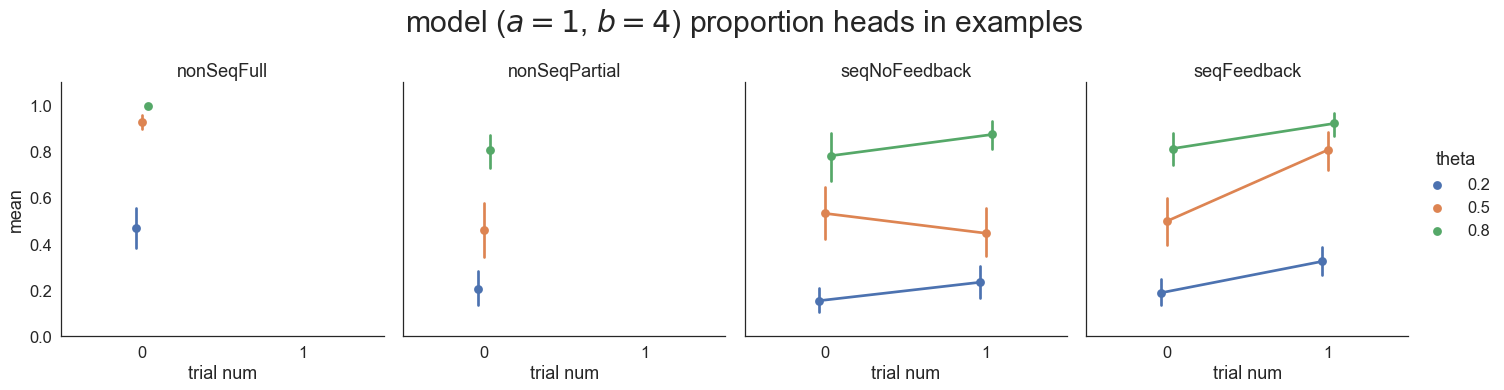

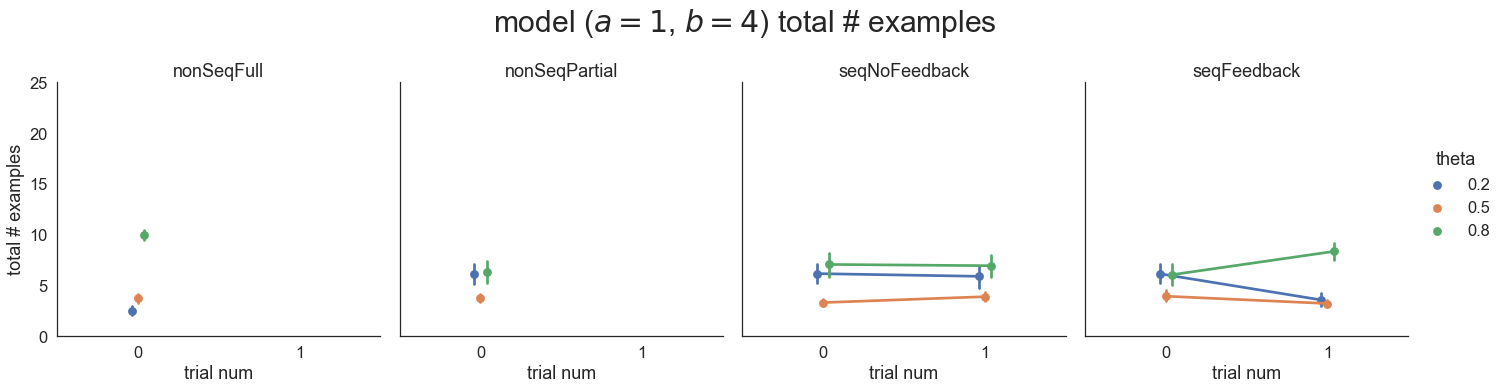

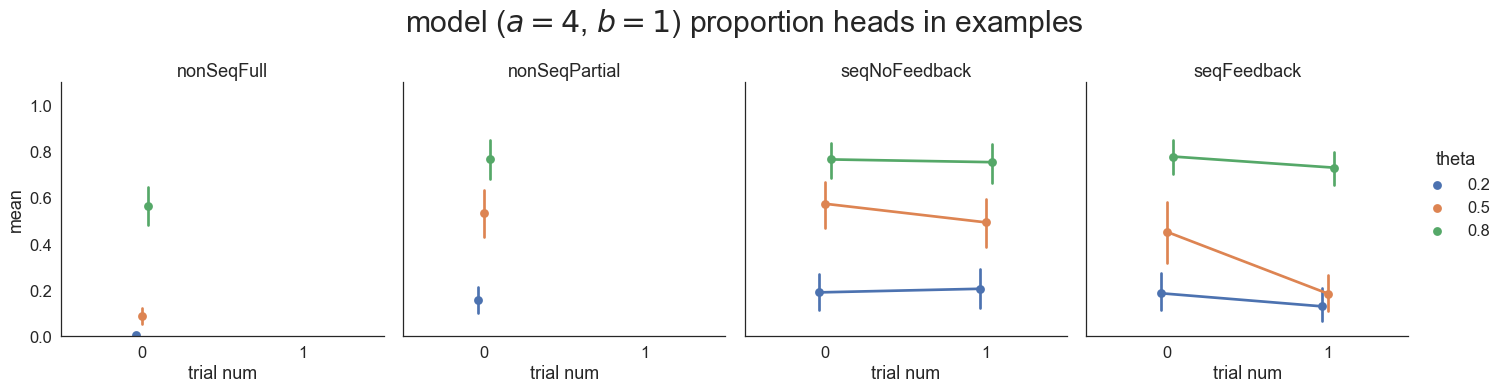

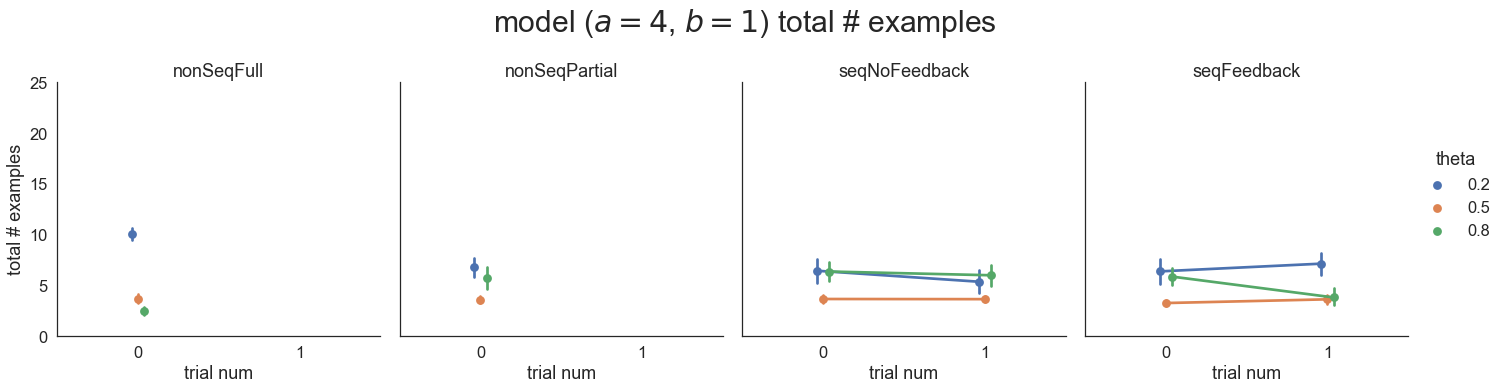

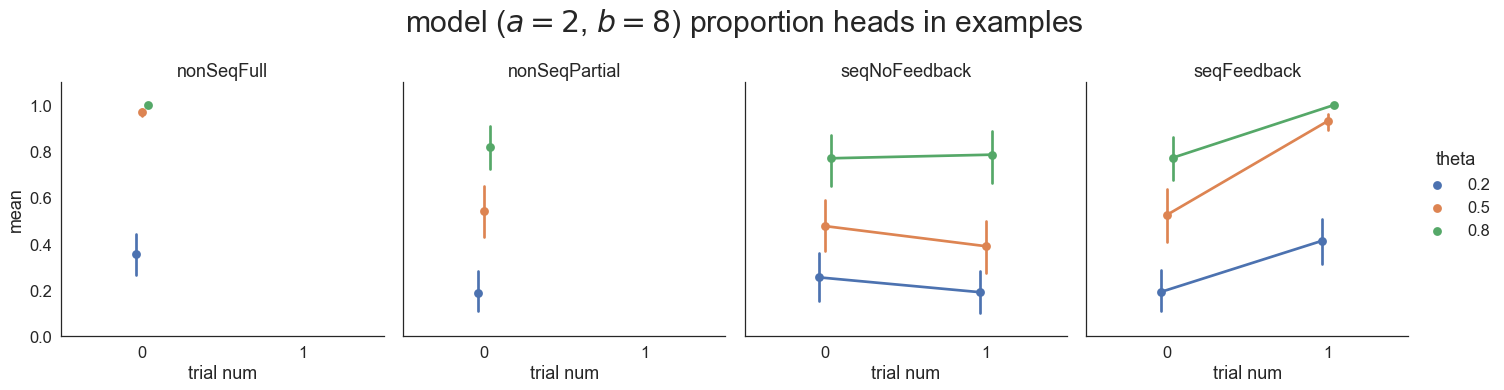

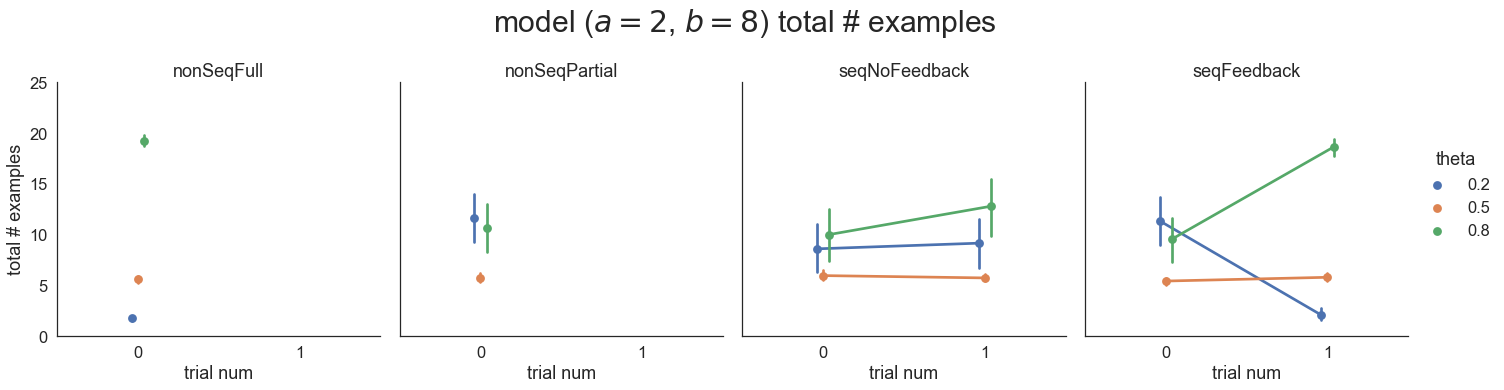

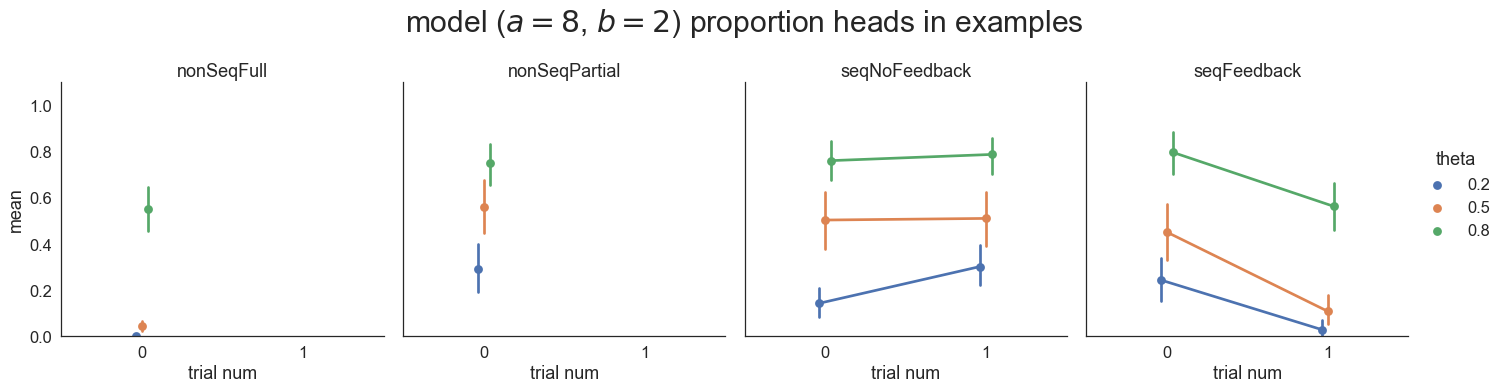

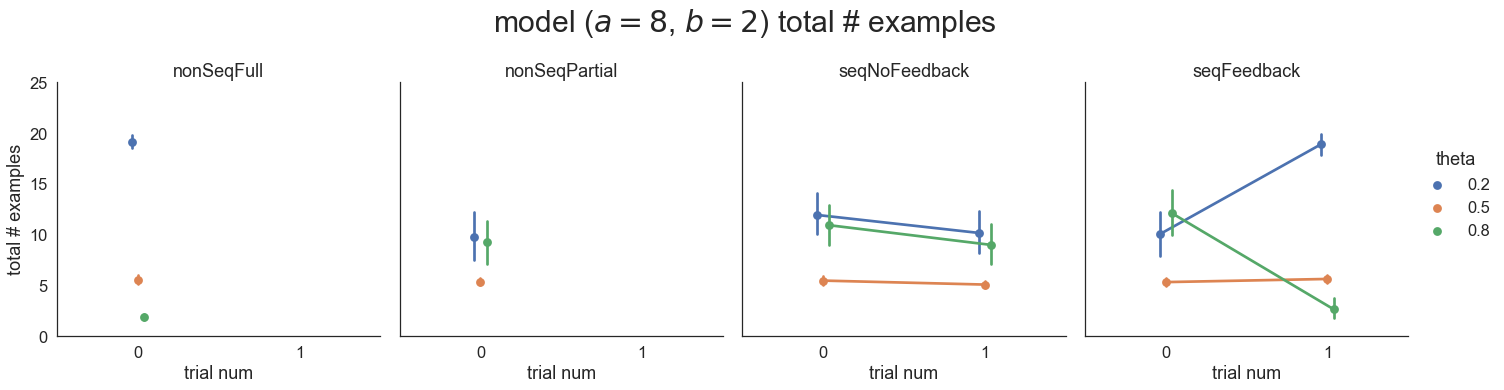

In [19]:
class_hypers = {
    'A': "($a=1$, $b=4$)",
    'B': "($a=4$, $b=1$)",
    'C': "($a=2$, $b=8$)",
    'D': "($a=8$, $b=2$)"
}

for class_id, hypers in class_hypers.items():
    g = sns.catplot(data=df[(df['student_class'] == class_id)], x='trial_num',
                    y='mean', hue='theta', col='block_type', kind='point', dodge=True,
                    col_order=['nonSeqFull', 'nonSeqPartial', 'seqNoFeedback', 'seqFeedback'])
    (g.set_axis_labels("trial num")
     .set_titles("{col_name}")
     .set(ylim=(0, 1.1))
     .figure.suptitle("model " + hypers + " proportion heads in examples", y=1.1, size=30)
     )

    g = sns.catplot(data=df[(df['student_class'] == class_id)], x='trial_num',
                    y='total_ex', hue='theta', col='block_type', kind='point', dodge=True,
                    col_order=['nonSeqFull', 'nonSeqPartial', 'seqNoFeedback', 'seqFeedback'])
    (g.set_axis_labels("trial num", "total # examples")
    .set(ylim=(0, 25))
     .set_titles("{col_name}")
     .figure.suptitle("model " + hypers + " total # examples", y=1.1, size=30)
     )


Look at the actual points

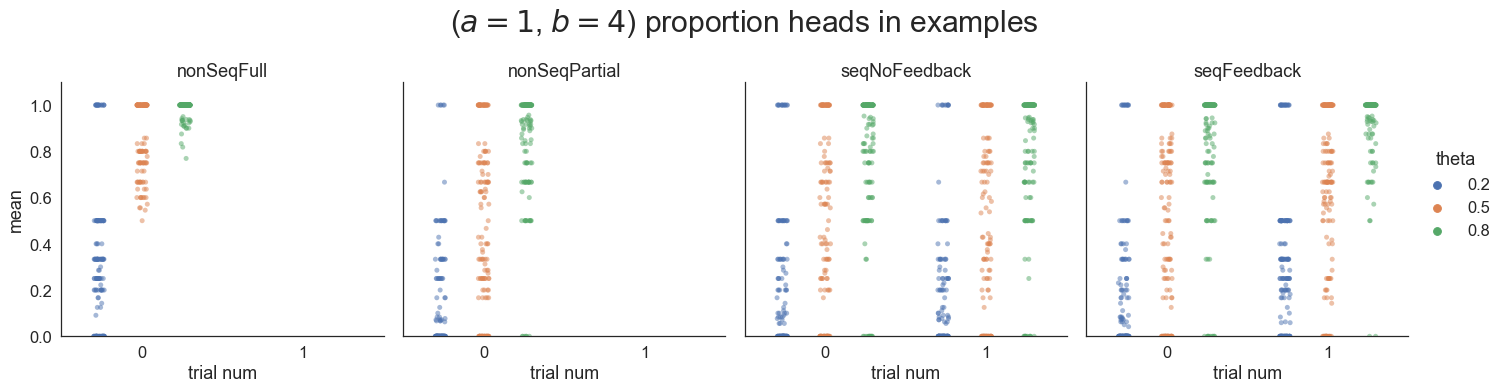

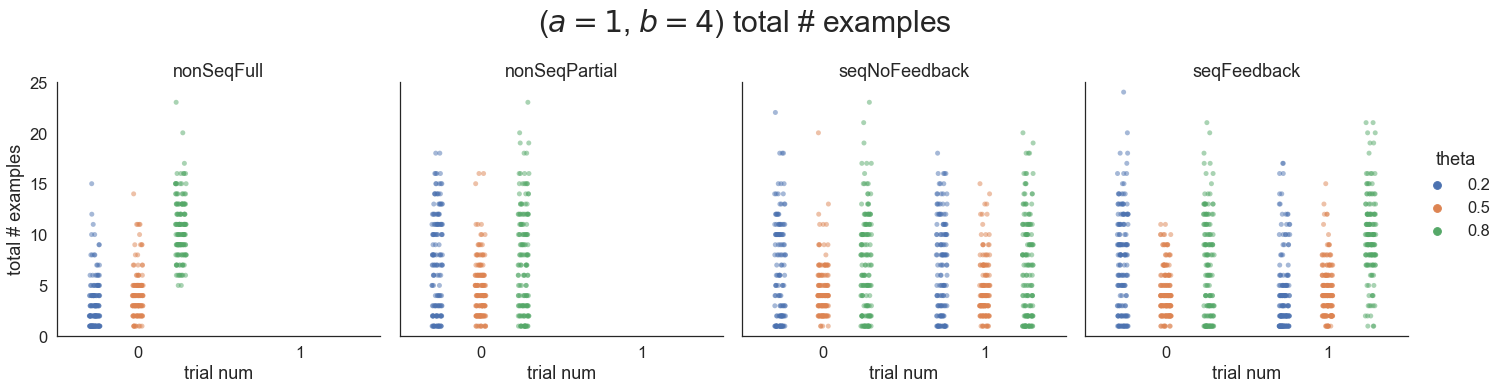

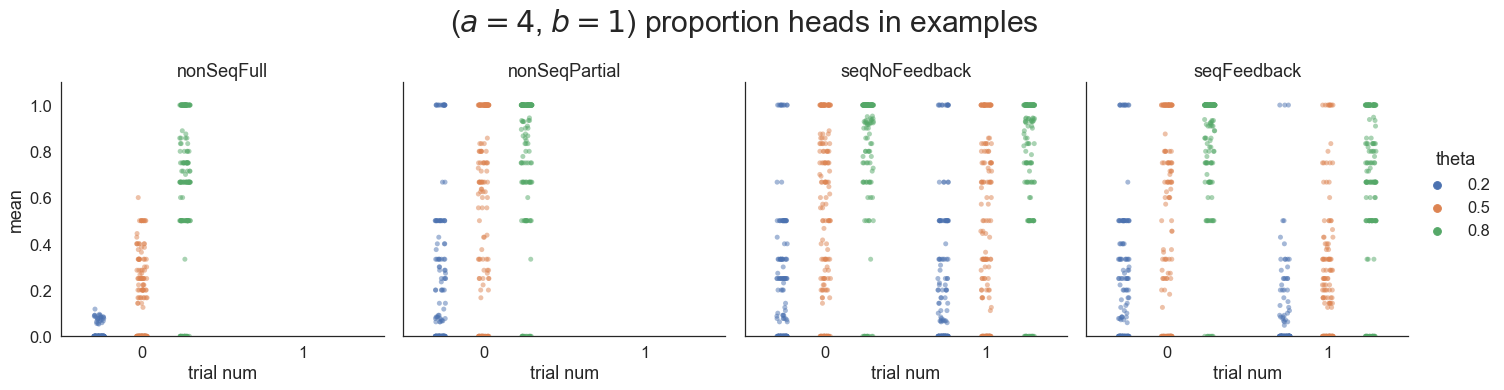

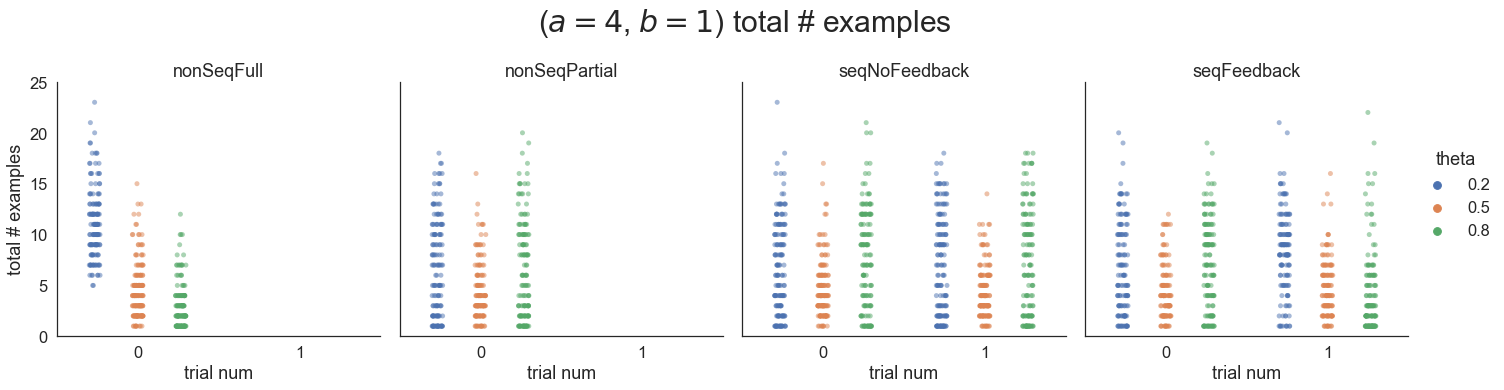

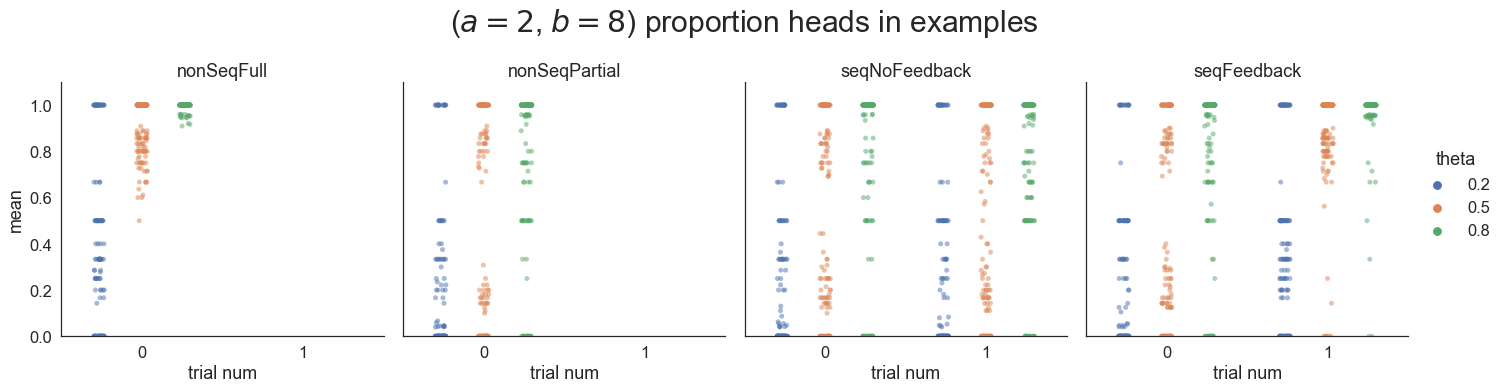

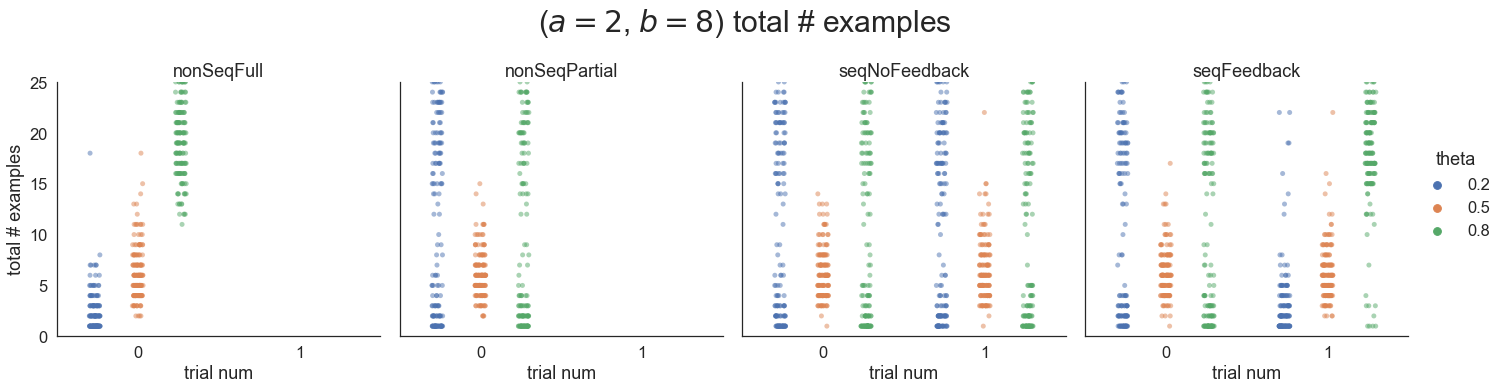

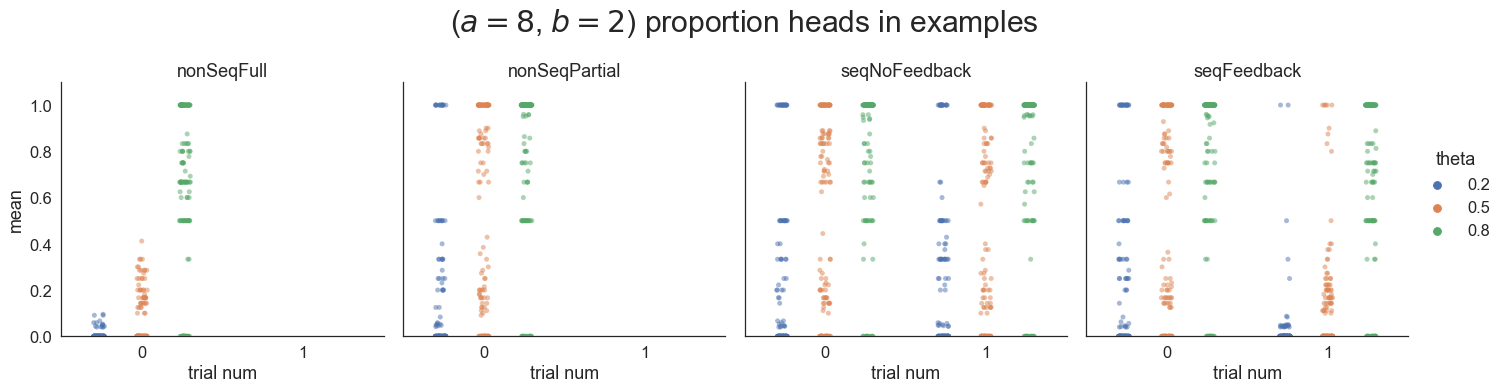

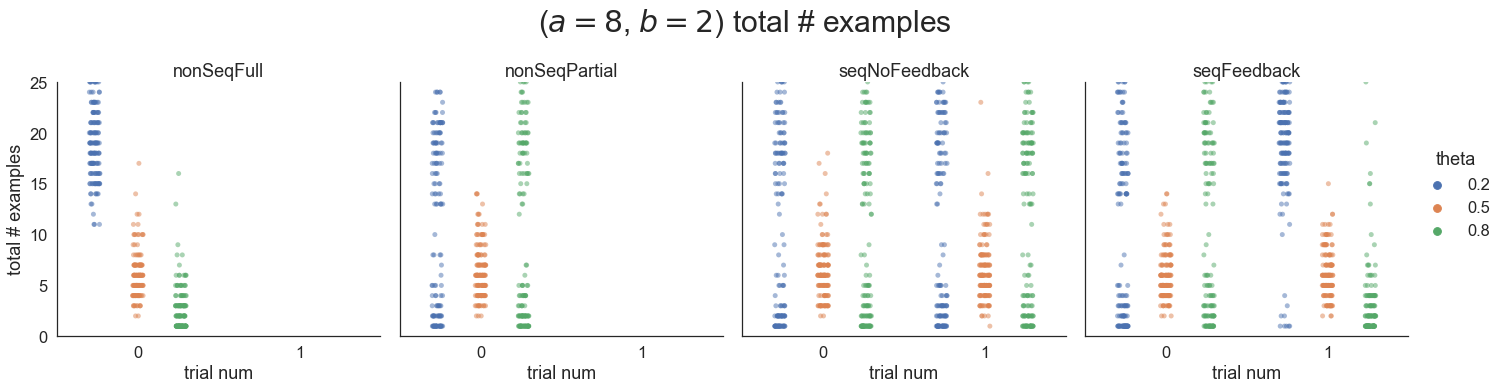

In [21]:
class_hypers = {
    'A': "($a=1$, $b=4$)",
    'B': "($a=4$, $b=1$)",
    'C': "($a=2$, $b=8$)",
    'D': "($a=8$, $b=2$)"
}

for class_id, hypers in class_hypers.items():
    g = sns.catplot(data=df[(df['student_class'] == class_id)], x='trial_num',
                    y='mean', hue='theta', col='block_type', dodge=True,
                    col_order=['nonSeqFull', 'nonSeqPartial', 'seqNoFeedback', 'seqFeedback'], alpha=0.5)
    (g.set_axis_labels("trial num")
     .set_titles("{col_name}")
     .set(ylim=(0, 1.1))
     .figure.suptitle(hypers + " proportion heads in examples", y=1.1, size=30)
     )

    g = sns.catplot(data=df[(df['student_class'] == class_id)], x='trial_num',
                    y='total_ex', hue='theta', col='block_type', dodge=True,
                    col_order=['nonSeqFull', 'nonSeqPartial', 'seqNoFeedback', 'seqFeedback'], alpha=0.5)
    (g.set_axis_labels("trial num", "total # examples")
    .set(ylim=(0, 25))
     .set_titles("{col_name}")
     .figure.suptitle(hypers + " total # examples", y=1.1, size=30)
     )
